In [1]:
!git clone https://github.com/Baxi19/games_cover_dataset.git

Cloning into 'games_cover_dataset'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (349/349), done.
remote: Compressing objects: 100% (344/344), done.
remote: Total 349 (delta 3), reused 344 (delta 2), pack-reused 0
Receiving objects: 100% (349/349), 3.30 MiB | 9.28 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow import keras


K.clear_session()

# Localizacion de las imagenes 
data_entrenamiento = '/content/games_cover_dataset/data/entrenamiento'
data_validacion = '/content/games_cover_dataset/data/validacion'

# Parameters
epocas = 20
longitud, altura = 150, 150
batch_size = 32
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
#clases = 3
clases = 2
lr = 0.0004


# Preparamos las imagenes de entrenamiento
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,   #Rescalar
    shear_range=0.2,    #inclina las images
    zoom_range=0.2,     #Zoom a la imagenes
    horizontal_flip=True)# Gira la imagen

# Para validacion se le dan las imagenes como vienen sin alterarlas
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Se encarga de ir al directorio abrir todas las carpetas y las procesa con la altura, longitud, batch size, etc
entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

# Hace lo mismo que el anterior pero con la data de validacion
validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

# Creamos la red secuencial y sus capas
cnn = Sequential() 
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding="same",
        input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=lr)

cnn.compile(loss='categorical_crossentropy',
            #optimizer=keras.optimizers.Adam(learning_rate=lr),
            optimizer=opt,
            metrics=['accuracy'])


cnn.fit_generator(
    entrenamiento_generador,
    steps_per_epoch= len(entrenamiento_generador) ,
    epochs=epocas,
    validation_data=validacion_generador,
    validation_steps=len(validacion_generador)
)

target_dir = './modelo/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5')


Found 240 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 1.0509 - accuracy: 0.5893 - val_loss: 0.4093 - val_accuracy: 0.5429
Epoch 2/20
8/8 [==============================] - 8s 931ms/step - loss: 0.3150 - accuracy: 0.8848 - val_loss: 0.0954 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 8s 943ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 8s 927ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 8s 941ms/step - loss: 0.0176 - accuracy: 0.9898 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 8s 930ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 8s 930ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 8/20
8/8 [=======

In [18]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

longitud, altura = 150, 150
modelo = '/content/modelo/modelo.h5'
pesos_modelo = '/content/modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)

def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("Resultado: Control")
  elif answer == 1:
    print("Resultado: Phone")
  #elif answer == 2:
  #  print("Resultado: Red Dead Redemption: II")

  return answer

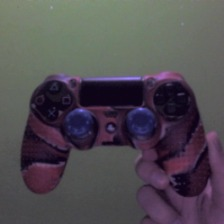

In [19]:
# Image to predict 
from IPython.display import Image
Image('/content/games_cover_dataset/data/pruebas/control/0.jpg')

In [20]:
# Control 
predict('/content/games_cover_dataset/data/pruebas/control/0.jpg')

Resultado: Control


0

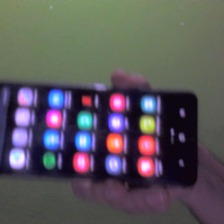

In [21]:
# Image to predict 
from IPython.display import Image
Image('/content/games_cover_dataset/data/pruebas/phone/0.jpg')

In [22]:
# Phone
predict('/content/games_cover_dataset/data/pruebas/phone/0.jpg')

Resultado: Phone


1